In [28]:
import pandas as pd
import seaborn as sns
#df.isnull()

In [29]:
df = pd.read_csv ('titanic-passengers.csv',sep=";") 


In [30]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [31]:
df['Age'].fillna(df['Age'].mean())


0      28.000000
1      25.000000
2      20.000000
3      29.000000
4      31.000000
         ...    
886    14.000000
887    22.000000
888    30.000000
889    29.699118
890    19.000000
Name: Age, Length: 891, dtype: float64

In [32]:
val=df['Cabin'].mode()
df['Cabin'].fillna(val,inplace=True)


In [33]:
val

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [34]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S


In [35]:
df['Cabin'].isnull().sum()

685

In [36]:
df=df.drop(['Cabin'], axis=1)

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,S


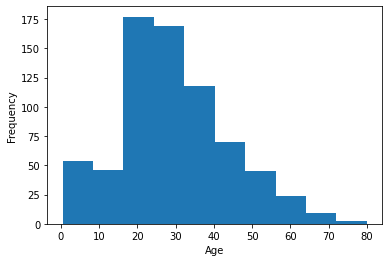

In [38]:
import matplotlib.pyplot as plt
plt.xlabel('Age')
df['Age'].plot.hist()

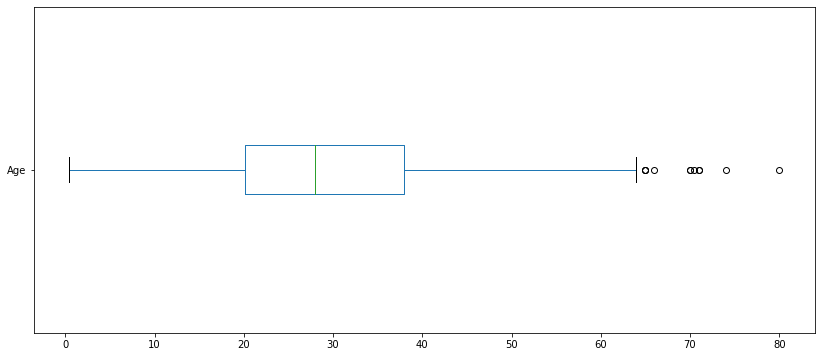

In [39]:
df['Age'].plot(kind='box', vert=False, figsize=(14,6))

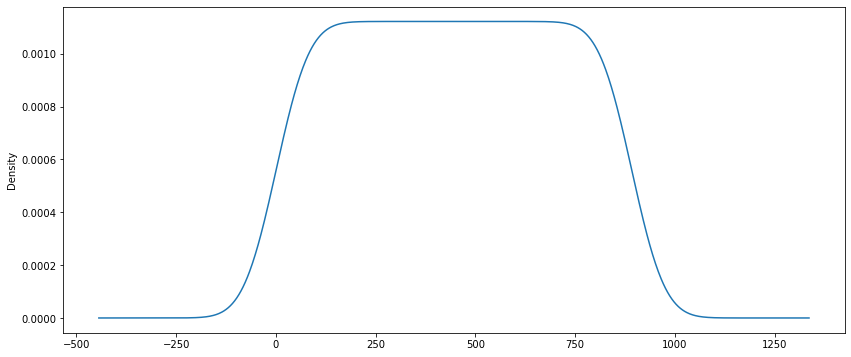

In [40]:
df['PassengerId'].plot(kind='density', figsize=(14,6))

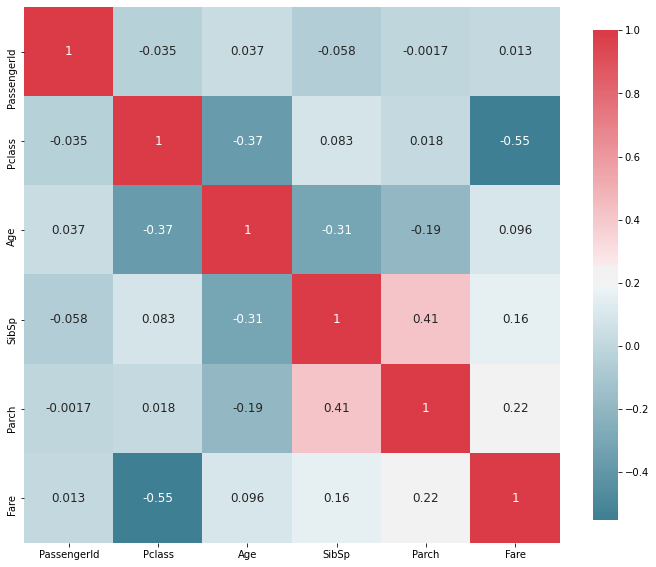

In [41]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)
   

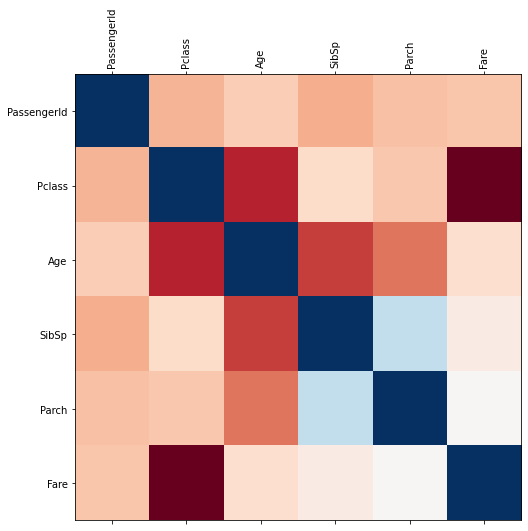

In [42]:
corr = df.corr()
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

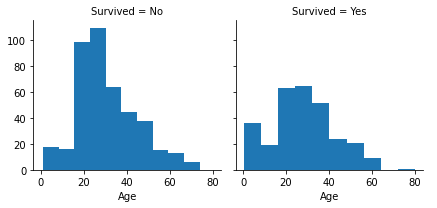

In [43]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age',bins=10)
g.add_legend()

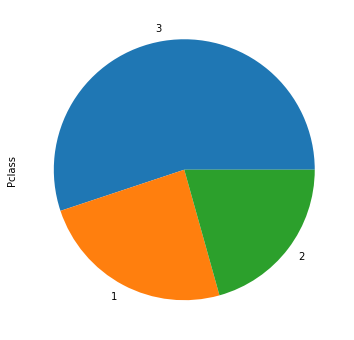

In [44]:
df['Pclass'].value_counts().plot(kind='pie', figsize=(6,6))

C:\Users\Rania\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


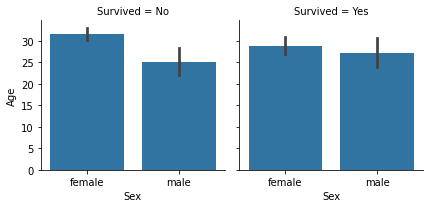

In [45]:
g=sns.FacetGrid(df,col='Survived')
g.map(sns.barplot,'Sex','Age')
g.add_legend()

In [46]:
g=sns.FacetGrid(df,col=('Survived'='Yes'))
g.map(sns.barplot,'Sex','Age')
g.add_legend()
#j'ai juste besoin des passagers vivants, comment le faire?


SyntaxError: invalid syntax (<ipython-input-46-90b0dd202f67>, line 1)

In [47]:
df.groupby(by='Survived')['Pclass'].mean()


Survived
No     2.531876
Yes    1.950292
Name: Pclass, dtype: float64

In [48]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer”,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess": "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }



SyntaxError: EOL while scanning string literal (<ipython-input-48-29294acf86da>, line 11)

In [49]:
df['Title']=df['Name'].str.split(" ") 

In [50]:
df['Title']

0                        [Collander,, Mr., Erik, Gustaf]
1                           [Moen,, Mr., Sigurd, Hansen]
2                            [Jensen,, Mr., Hans, Peder]
3      [Palsson,, Mrs., Nils, (Alma, Cornelia, Berglu...
4                             [Davidson,, Mr., Thornton]
                             ...                        
886            [Nasser,, Mrs., Nicholas, (Adele, Achem)]
887                            [Sirayanian,, Mr., Orsen]
888                              [Cacic,, Miss., Marija]
889                [Petroff,, Mr., Pastcho, ("Pentcho")]
890    [Phillips,, Miss., Kate, Florence, ("Mrs, Kate...
Name: Title, Length: 891, dtype: object

In [51]:
df['Titles']=' '
for i in range(df.shape[0]) :
    #print(i)
    df['Titles'][i]=df['Title'][i][1][:-1]

<ipython-input-51-df6ffad9871e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Titles'][i]=df['Title'][i][1][:-1]


In [52]:
df['Titles']

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Titles, Length: 891, dtype: object

In [53]:
df['Title']=df['Titles']

In [54]:
df['Title']

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Title, Length: 891, dtype: object

In [55]:
df=df.drop(['Name'], axis=1)

In [56]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Titles
0,343,No,2,male,28.0,0,0,248740,13.0000,S,Mr,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,S,Mr,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,S,Mr,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,S,Mrs,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,C,Mrs,Mrs
887,61,No,3,male,22.0,0,0,2669,7.2292,C,Mr,Mr
888,535,No,3,female,30.0,0,0,315084,8.6625,S,Miss,Miss
889,102,No,3,male,NaN,0,0,349215,7.8958,S,Mr,Mr


In [57]:
df=df.drop(['Titles'], axis=1)

In [58]:
#df['Title']=df.Name.str.extract(' ([A-Za-z]+).')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,C,Mrs
887,61,No,3,male,22.0,0,0,2669,7.2292,C,Mr
888,535,No,3,female,30.0,0,0,315084,8.6625,S,Miss
889,102,No,3,male,NaN,0,0,349215,7.8958,S,Mr


In [59]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [66]:
df.replace(Title_Dictionary,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
0,343,No,2,male,28.0,0,0,248740,13.0000,S,10,0
1,76,No,3,male,25.0,0,0,348123,7.6500,S,10,0
2,641,No,3,male,20.0,0,0,350050,7.8542,S,10,0
3,568,No,3,female,29.0,0,4,349909,21.0750,S,10,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,S,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,C,10,1
887,61,No,3,male,22.0,0,0,2669,7.2292,C,10,0
888,535,No,3,female,30.0,0,0,315084,8.6625,S,9,0
889,102,No,3,male,NaN,0,0,349215,7.8958,S,10,0


In [61]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['Title']=encoder.fit_transform(df['Title'])


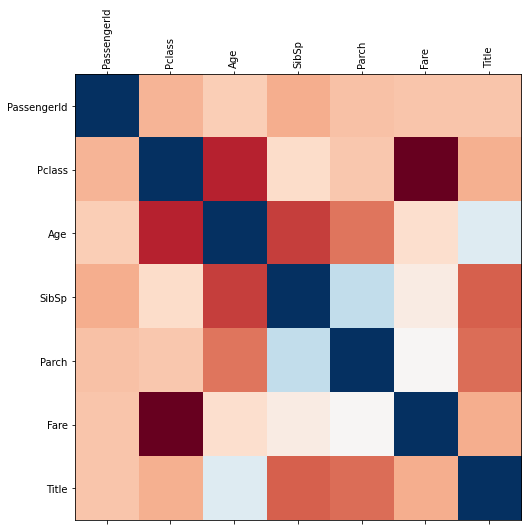

In [62]:
corr = df.corr()
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [63]:
df['Family Size']=df['Parch']+df['SibSp']

In [64]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
0,343,No,2,male,28.0,0,0,248740,13.0000,S,10,0
1,76,No,3,male,25.0,0,0,348123,7.6500,S,10,0
2,641,No,3,male,20.0,0,0,350050,7.8542,S,10,0
3,568,No,3,female,29.0,0,4,349909,21.0750,S,10,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,S,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,C,10,1
887,61,No,3,male,22.0,0,0,2669,7.2292,C,10,0
888,535,No,3,female,30.0,0,0,315084,8.6625,S,9,0
889,102,No,3,male,NaN,0,0,349215,7.8958,S,10,0


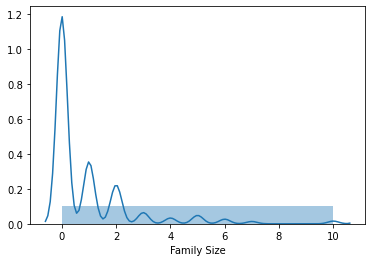

In [71]:
sns.distplot(df["Family Size"], bins=1,hist=True,kde=True)


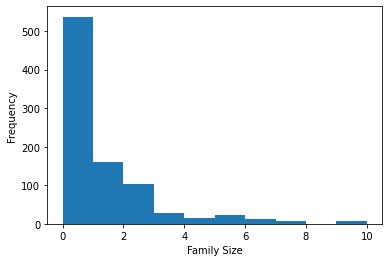

In [72]:
plt.xlabel("Family Size")
df['Family Size'].plot.hist()